# Level Invariant Normalized Loss Function

Braun, Sebastian, and Ivan Tashev. "Data augmentation and loss normalization for deep noise suppression." Speech and Computer: 22nd International Conference, SPECOM 2020, St. Petersburg, Russia, October 7–9, 2020, Proceedings 22
. Springer International Publishing, 2020.

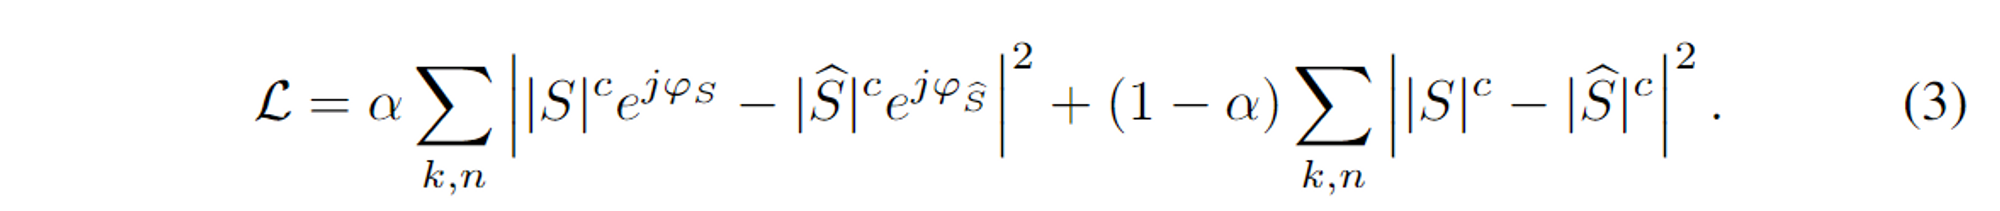

$0 < c \leq 1$ : magnitudes compression

 $0 \leq \alpha \leq 1$ : complex loss factor

$c = 0.3$

$\alpha = 0.3$

In [3]:
import torch
import torch.nn as nn

In [26]:
class LevelInvariantNormalizedLoss(nn.Module) : 
    """
    Braun, Sebastian, and Ivan Tashev. "Data augmentation and loss normalization for deep noise suppression." 
    Speech and Computer: 22nd International Conference, SPECOM 2020, 
    St. Petersburg, Russia, October 7–9, 2020, Proceedings 22. Springer International Publishing, 2020.
    """
    def __init__(self,alpha = 0.3, c = 0.3, n_fft = 512):
        super(LevelInvariantNormalizedLoss, self).__init__()
        self.n_fft = n_fft
        self.window = torch.hann_window(n_fft)
        self.alpha = alpha
        self.c = c
        self.MSE = torch.nn.MSELoss()
        
    def forward(self,output,target):
        # Normalize
        
        # STFT
        Y = torch.stft(output,self.n_fft,return_complex=True,center=False,window=self.window)
        S = torch.stft(target,self.n_fft,return_complex=True,center=False,window=self.window)
        
        # Compress
        mag_Y = torch.pow(torch.abs(Y),self.c)
        mag_S = torch.pow(torch.abs(S),self.c)
        
        # Complex
        phase_Y = torch.exp(1j*torch.angle(Y))
        phase_S = torch.exp(1j*torch.angle(S))
        
        # Complex MSE is not implemented
        cL = ((torch.abs(mag_Y*phase_Y - mag_S*phase_S))**2).mean()
        
        mL = self.MSE(mag_Y,mag_S)
        # Loss
        L = self.alpha*cL + (1-self.alpha)*mL
        
        return L



In [27]:
x = torch.rand(4,32000)
s = torch.rand(4,32000)

criterion = LevelInvariantNormalizedLoss()

loss = criterion(x,s)

print(loss)

tensor(1.3144)
